In [4]:
from FPGA_AWG_client import *

In [5]:
## instantiate a client

client = FPGA_AWG_client()


In [6]:
## connect the client to the already running server
client.connect(host='192.168.0.234', port=2345)

Connected to server 192.168.0.234 on port 2345


In [33]:
## define local directories that stores the waveform, program, envelope files. 
## waveform and program files must be in .json, envelope files must be in .csv

waveform_dir = "./waveform"
prog_dir = "./program"
envelope_dir = "./envelope"

In [34]:
## ask the server about its current list of files

client.get_waveform_lst()
client.get_program_lst()
client.get_envelope_lst()

[Server acknowledgement]: Current waveform list: ['-Xhalf', '+X', '+Xhalf', 'X', 'Y_pi']
[Server acknowledgement]: Current program list: ['f_Echo', 'test_program', 'test_envelope']
[Server acknowledgement]: Current envelope list: ['half_circle']


In [36]:
## upload a local program file to the server

path = prog_dir + "/" + "test_prog.json"
client.upload_program(path, name="test_prog")

## now run get_waveform_lst again, do you see your program show up in the server acknowledgement?
client.get_waveform_lst()


File has been sent.
[Server acknowledgement]: File received successfully.


In [ ]:
### Now, let's upload a series of configuration files


path = waveform_dir + "/" + "X.json"
client.upload_waveform_cfg(path, name="X")

path = waveform_dir + "/" + "Y.json"
client.upload_waveform_cfg(path, name="Y")

path = waveform_dir + "/" + "X_half.json"
client.upload_waveform_cfg(path, name="X_half")

path = waveform_dir + "/" + "n_X_half.json"
client.upload_waveform_cfg(path, name="n_X_half")

path = waveform_dir + "/" + "X_periodic.json"
client.upload_waveform_cfg(path, name="X_periodic")

path = waveform_dir + "/" + "X_enveloped.json"
client.upload_waveform_cfg(path, name="X_enveloped")


In [37]:
path = prog_dir + "/" + "f_XY8.json"
client.upload_program(path, name="f_XY8")

path = prog_dir + "/" + "looped_XY8.json"
client.upload_program(path, name="looped_XY8")

File has been sent.
[Server acknowledgement]: File received successfully.


In [93]:

## set the trigger mode to internal or external
## in external mode, client.start_program must be executed first, 
# then upon hearing a trigger, the pulse sequence will be ran

client.set_trigger_mode("internal")

[Server acknowledgement]: Trigger is set to external.


In [98]:
### The server will compile the program into assembly and execute it
### if you see a compilation error on this line, then you need to check for syntax errors in your json files! 

client.start_program("f_XY8")

[Server acknowledgement]: Program [f_XY8] has started...


In [99]:
### stop the server program to exit the firing mode, causing the server to enter listening mode
### you can only upload files to the server when it is in listening mode

client.stop_program()

[Server acknowledgement]: Program is stopped. Server resumes listening...


In [58]:
### disconnect from the server

client.disconnect()

Disconnected from server at 192.168.0.234:8080


### Generate enveloped pulse

In [40]:
import numpy as np

### Here, let's generate a pulse enveloped by a semicircle. 
### remember the time step is 2.6ns, for each time step, we must generate 16 data points


# Parameters
max_value = 30000
n_values = 3200  # Length of the list, must be a multiple of 16

# Generate angles between 0 and pi (half-circle)
angles = np.linspace(0, np.pi, n_values)

# Compute the corresponding y-values on the half-circle
half_circle_values = np.sin(angles)

# Scale values to the desired range [0, max_value]
scaled_values = (half_circle_values * max_value).astype(int)

# Convert to a list
number_list = scaled_values.tolist()

print("Generated list:")
print(number_list)

Generated list:
[0, 29, 58, 88, 117, 147, 176, 206, 235, 265, 294, 324, 353, 382, 412, 441, 471, 500, 530, 559, 589, 618, 648, 677, 707, 736, 765, 795, 824, 854, 883, 913, 942, 972, 1001, 1030, 1060, 1089, 1119, 1148, 1178, 1207, 1237, 1266, 1295, 1325, 1354, 1384, 1413, 1443, 1472, 1501, 1531, 1560, 1590, 1619, 1649, 1678, 1707, 1737, 1766, 1796, 1825, 1854, 1884, 1913, 1943, 1972, 2001, 2031, 2060, 2090, 2119, 2148, 2178, 2207, 2237, 2266, 2295, 2325, 2354, 2383, 2413, 2442, 2471, 2501, 2530, 2560, 2589, 2618, 2648, 2677, 2706, 2736, 2765, 2794, 2824, 2853, 2882, 2912, 2941, 2970, 3000, 3029, 3058, 3087, 3117, 3146, 3175, 3205, 3234, 3263, 3293, 3322, 3351, 3380, 3410, 3439, 3468, 3497, 3527, 3556, 3585, 3614, 3644, 3673, 3702, 3731, 3761, 3790, 3819, 3848, 3878, 3907, 3936, 3965, 3994, 4024, 4053, 4082, 4111, 4140, 4170, 4199, 4228, 4257, 4286, 4315, 4344, 4374, 4403, 4432, 4461, 4490, 4519, 4548, 4578, 4607, 4636, 4665, 4694, 4723, 4752, 4781, 4810, 4839, 4868, 4898, 4927, 4956, 49

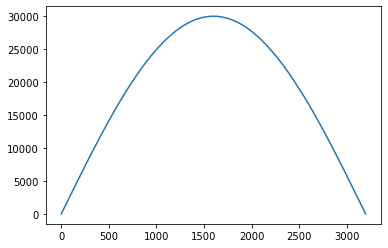

In [24]:
import matplotlib.pyplot as plt
plt.plot(number_list)

In [25]:
import csv


### save the generated array to csv 
# List of numbers

def save_to_csv(csv_filename, lst):
    # Open the CSV file in write mode
    with open(csv_filename, mode='w', newline='') as file:
        writer = csv.writer(file)

        # Write each number as a new row in the CSV
        for item in lst:
            writer.writerow([item])
            
def read_csv_to_lst(csv_filename):
    lst = []
    # Open the CSV file in read mode
    with open(csv_filename, mode='r') as file:
        reader = csv.reader(file)

        # Read each row and append the number to the list
        for row in reader:
            # Convert the number from string to int (or float, if needed)
            lst.append(int(row[0]))  # Use float(row[0]) if they are floating-point numbers
    return lst

In [26]:
idata_name = "./envelope/half_circle.csv"
save_to_csv(idata_name, number_list)

In [27]:
### upload the envelope data to the server

client.upload_envelope_data(idata_name, name="half_circle")

File has been sent.
[Server acknowledgement]: File received successfully.


In [28]:

### upload the envelope program to the server
path = prog_dir + "/" + "test_envelope.json"

client.upload_program(path, name="test_envelope")

File has been sent.
[Server acknowledgement]: File received successfully.


In [29]:
client.get_program_lst()
client.get_envelope_lst()
client.get_waveform_lst()

[Server acknowledgement]: Current program list: ['f_Echo', 'test_program', 'test_envelope']
[Server acknowledgement]: Current envelope list: ['half_circle']
[Server acknowledgement]: Current waveform list: ['-Xhalf', '+X', '+Xhalf', 'X', 'Y_pi']


In [31]:
client.start_program("test_envelope")

[Server acknowledgement]: Compilation Error: [Errno 2] No such file or directory: './waveform_cfg/X_enveloped.json'


In [32]:

client.stop_program()

[Server acknowledgement]: FPGA is not firing pulses: current AWG state is listening.


In [ ]:
client.disconnect()

### Generate another enveloped pulse

In [ ]:
import numpy as np

### There is a hardware limitation: the smallest pulse the server can generate is 2 * 2.6 ns
### additionally, the duration of all pulses must also be a multiple of 2.6ns
### if you want to breach this constraint, then you can upload a flat top envelop, 
### because envelopes have higher resolution, you can make each pulse shorter



flat_top = np.ones(16 * 9 + 8, dtype=int) * 30000
pad = np.zeros(8, dtype=int)

flat_envelope = np.concatenate((flat_top, pad))

In [ ]:
### check the array
flat_envelope

In [ ]:
### upload the envelope to the server

idata_name = "./envelope/flat.csv"
save_to_csv(idata_name, flat_envelope)

In [ ]:


client.upload_envelope_data(idata_name, name="flat")

In [ ]:
path = waveform_dir + "/" + "X.json"
client.upload_waveform_cfg(path, name="X")


### remember to modify the X_enveloped.json file to use flat_envelope instead of half_circle!
path = waveform_dir + "/" + "X_enveloped.json"
client.upload_waveform_cfg(path, name="X_enveloped")

In [ ]:
path = prog_dir + "/" + "test_buffer.json"

client.upload_program(path, name="test_buffer")

In [ ]:
client.get_waveform_lst()
client.get_envelope_lst()
client.get_program_lst()

In [ ]:
client.start_program("test_buffer")

In [ ]:
client.stop_program()

In [ ]:
client.disconnect()